# Atividade 04 - Classificadores 

* K-means
* Decision Tree
* PCA

### Nome: Alessandro Souza Siva, matrícula: 399941

### Implementação dos classificadores
Todos os métodos implementados estão salvos no módulo Classificadores!

In [1]:
from Classificadores import KMeans, DecisionTree, PCA

### Implementação das funções para cálculo da acurácia, método do cotovelo e K-fold. 
Os métodos implementados estão salvo no módulo Utils

In [2]:
from Utils import accuracy, elbow_method, kfold

### Conjunto de dados

#### Leitura do conjunto de dados

In [3]:
import pandas as pd

data = pd.read_csv("./data/trab4.data" , sep=",", header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [4]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values.reshape(-1,1)

### Relatório

#### K-means

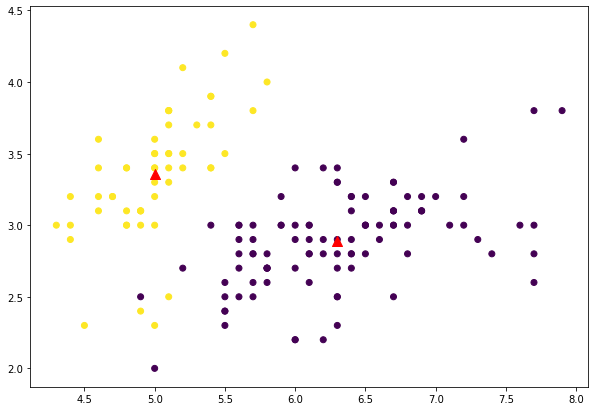

In [5]:
import matplotlib.pyplot as plt

# k = 2
model = KMeans( n_clusters=2 )
model.fit( X )

plt.figure( figsize=(10,7) )
plt.scatter(X[:,0], X[:,1], c=model.predict( X )[:,0])
plt.scatter(model.centroids[:,0], model.centroids[:,1], marker='^', c='red', s=100)
plt.show()

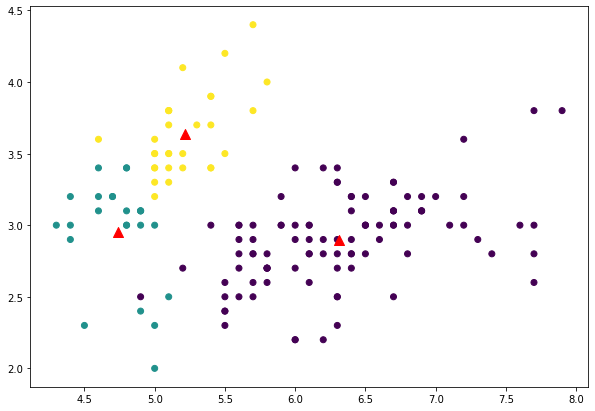

In [6]:
# k = 3
model = KMeans( n_clusters=3 )
model.fit( X )

plt.figure( figsize=(10,7) )
plt.scatter(X[:,0], X[:,1], c=model.predict( X )[:,0])
plt.scatter(model.centroids[:,0], model.centroids[:,1], marker='^', c='red', s=100)
plt.show()

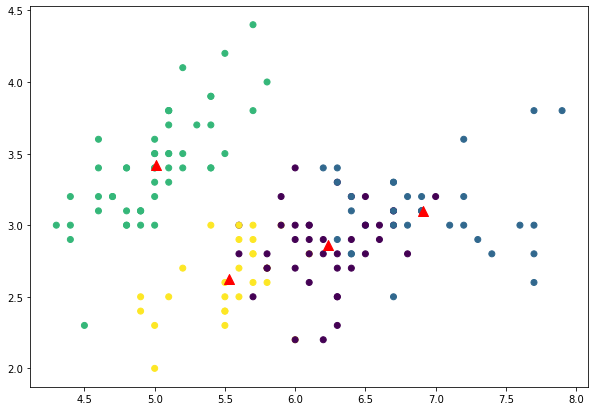

In [7]:
# k = 4
model = KMeans( n_clusters=4 )
model.fit( X )

plt.figure( figsize=(10,7) )
plt.scatter(X[:,0], X[:,1], c=model.predict( X )[:,0])
plt.scatter(model.centroids[:,0], model.centroids[:,1], marker='^', c='red', s=100)
plt.show()

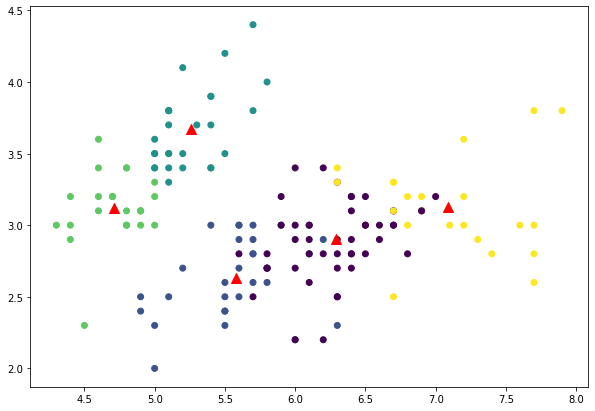

In [8]:
# k = 5
model = KMeans( n_clusters=5 )
model.fit( X )

plt.figure( figsize=(10,7) )
plt.scatter(X[:,0], X[:,1], c=model.predict( X )[:,0])
plt.scatter(model.centroids[:,0], model.centroids[:,1], marker='^', c='red', s=100)
plt.show()

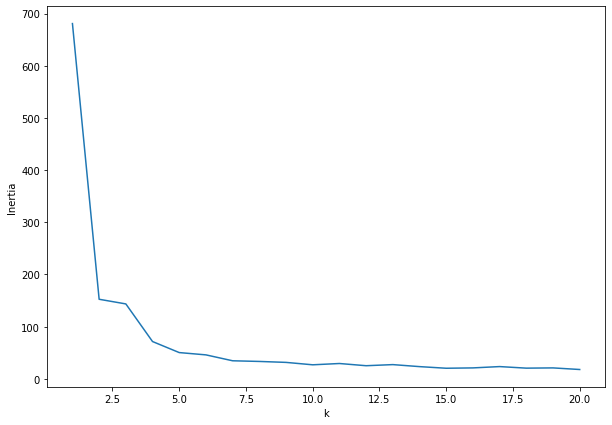

In [9]:
elbow_method( X, n=20 )

De acordo com o gráfico, 7 ou 8 parecem ser a quantidade ideal de clusters. Afinal, a partir desses valores a inertia não se altera significativamente.

#### PCA

In [10]:
pca = PCA( k_dimension=2 )
X_ = pca.fit_transform( X )

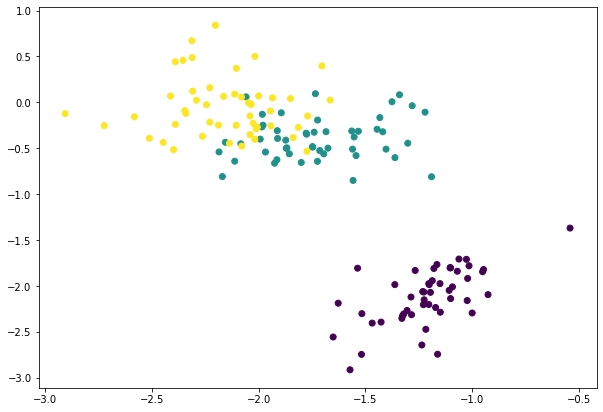

In [11]:
plt.figure( figsize=(10,7) )
plt.scatter(X_[:,0], X_[:,1], c=Y[:,0])
plt.show()

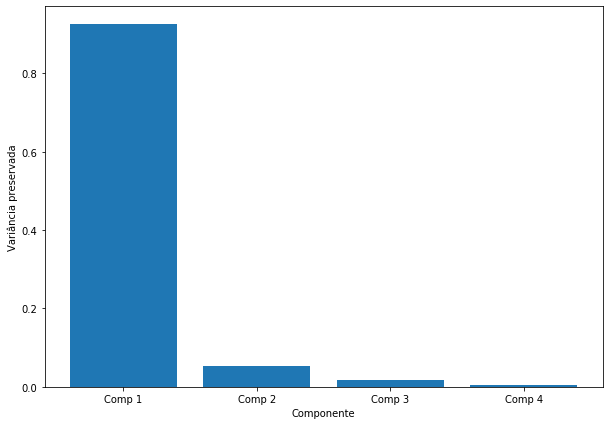

In [12]:
plt.figure( figsize=(10,7) )

plt.bar( [ "Comp 1", "Comp 2", "Comp 3", "Comp 4" ] , pca.explained_variance )
plt.xlabel("Componente")
plt.ylabel("Variância preservada")
plt.show()

#### Decision Tree

In [13]:
tree = DecisionTree( max_depth=5, min_size=10 )

In [14]:
acc = kfold( X, Y, 5, tree )

In [15]:
print( "Erro de classificação: ", acc)

Erro de classificação:  0.8866666666666667


In [16]:
tree.root

{'feature': 2,
 'value': 3.0,
 'left_child': {'feature': 0,
  'value': 5.1,
  'left_child': {'feature': 0,
   'value': 4.9,
   'left_child': {'feature': 0,
    'value': 4.7,
    'left_child': 1,
    'right_child': 1},
   'right_child': {'feature': 0,
    'value': 4.9,
    'left_child': 1,
    'right_child': 1}},
  'right_child': {'feature': 0,
   'value': 5.1,
   'left_child': 1,
   'right_child': 1}},
 'right_child': {'feature': 2,
  'value': 5.0,
  'left_child': {'feature': 0,
   'value': 5.0,
   'left_child': 2,
   'right_child': {'feature': 0,
    'value': 7.0,
    'left_child': {'feature': 0,
     'value': 6.4,
     'left_child': 2,
     'right_child': 2},
    'right_child': 2}},
  'right_child': {'feature': 3,
   'value': 1.8,
   'left_child': 2,
   'right_child': {'feature': 0,
    'value': 6.3,
    'left_child': 3,
    'right_child': {'feature': 0,
     'value': 6.3,
     'left_child': 3,
     'right_child': 3}}}}}